In [1]:
import pandas as pd
import numpy as np


In [ ]:
# Load dataset for linear regression
df_energy = pd.read_csv('energydata.csv')
df_energy

In [ ]:
# Remove date column, rv1, and rv2 columns
df_energy.drop('date', axis=1, inplace=True) # axis=1 to indicate we're dropping a column
df_energy.drop('rv1', axis=1, inplace=True)
df_energy.drop('rv2', axis=1, inplace=True)
df_energy

In [ ]:
# Sum appliances and lights for total energy
df_energy['energy'] = df_energy['Appliances'] + df_energy['lights']
df_energy

In [ ]:
# Then drop appliances and lights as they provide too much information
df_energy.drop('Appliances', axis=1, inplace=True)
df_energy.drop('lights', axis=1, inplace=True)
df_energy



In [ ]:
df_energy_X = df_energy.drop('energy', axis=1)
df_energy_y = df_energy['energy']
df_energy_X

In [2]:
from sklearn.linear_model import LinearRegression as LR
def PF(X, degree):
    X_np = pd.DataFrame.as_matrix(X)
    tmp_raise = X_np
    for i in range(2, degree+1):
        tmp_raise = np.append(tmp_raise, np.power(X_np, i), axis=1)
    X_np = tmp_raise
    finalarr = np.ones((X_np.shape[0], X_np.shape[1]+1))
    finalarr[:,:-1] = X_np
    return finalarr







In [3]:
# Do 60-20-20 train_test_split for training set, validation set, and test set
from sklearn.model_selection import train_test_split

def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)

    X_val, X_test, y_val, y_test = train_test_split(
        X_test, y_test, test_size=0.5, random_state=42)

    #print('X_train percentage: {}, X_val percentage: {}, X_test percentage: {}'
    #     .format(len(X_train)/len(X), 
    #             len(X_val)/len(X), 
    #             len(X_test)/len(X)))
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
validation_acc = []
for i in range(1,15):
    X_poly = PF(df_energy_X, i)
    X_train, X_val, X_test, y_train, y_val, y_test = split(X_poly, df_energy_y)
    LR_model = LR()
    LR_model.fit(X_train, y_train)
    print('training set R^2 for degree {}: {}'.format(i, 
                                                       LR_model.score(X_train, y_train)))
    print('validation set R^2 for degree {}: {}'. format(i,
                                                         LR_model.score(X_val, y_val)))
    validation_acc.append(LR_model.score(X_val, y_val))
validation_acc


In [ ]:
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(validation_acc))], validation_acc)
plt.axis([1, 15, -0.1, 0.2])
plt.show()
    

### MNIST Dataset
The Mnist Dataset is too large to be on github, you can download it here: https://pjreddie.com/media/files/mnist_train.csv

In [ ]:
np_mnist = np.loadtxt(open("mnist_train.csv", "rb"), delimiter=",", skiprows=1)
np_mnist

In [ ]:
df_mnist = pd.DataFrame(np_mnist)
df_mnist

In [ ]:
df_mnist.rename(columns={0: 'label'}, inplace=True)
df_mnist

In [ ]:
df_mnist_X = df_mnist.drop('label', axis=1)
df_mnist_y = df_mnist['label']

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split(df_mnist_X, df_mnist_y)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

LRmodel = LR(solver='lbfgs')
LRmodel.fit(X_train, y_train)
print('Logistic Regression Training Accuracy: {}'.format(LRmodel.score(X_train, y_train)))
print('Logistic Regression Validation Accuracy: {}'.format(LRmodel.score(X_val, y_val)))

In [ ]:
# Cross validation code that we won't run now, but you can try it in your own time
# This should take approximately 10 minutes to run (go grab dinner in between?)
# Recalling that C is inversely proportional to regularization strength

'''
for i in range(0.3, 1.3, 0.1):
    LRmodel = LR(C=i, solver='lbfgs')
    LRmodel.fit(X_train, y_train)
    print('Logistic Regression Training Accuracy with C = {}: {}'
         .format(i, LRmodel.score(X_train, y_train)))
    print('Logistic Regression Validation Accuracy with C = {}: {}'
         .format(i, LRmodel.score(X_val, y_val)))
'''


    

In [6]:
df_iris = pd.read_csv('iris.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
df_iris_X = df_iris.drop('species', axis=1)
df_iris_y = df_iris['species']
X_train, X_val, X_test, y_train, y_val, y_test = split(df_iris_X, df_iris_y)

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
clf = clf.fit(X_train, y_train)
print('Decision Tree train set accuracy: {}'.format(clf.score(X_train, y_train)))
print('Decision Tree validation set accuracy: {}'.format(clf.score(X_val, y_val)))


Decision Tree train set accuracy: 1.0
Decision Tree validation set accuracy: 1.0


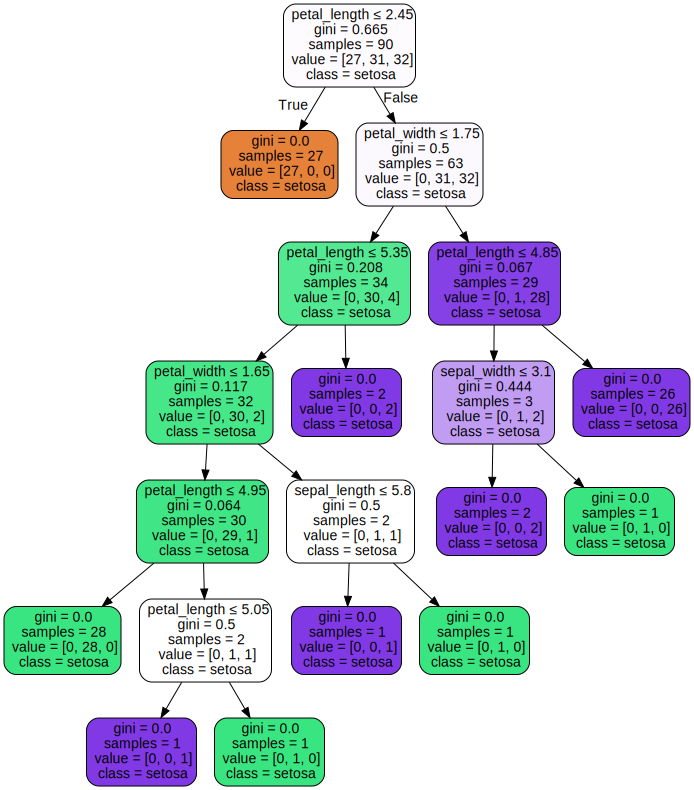

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df_iris_X.columns,  
                         class_names=df_iris_y,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 